#**Task 4 : Explore Decision Tree Algorithm**

**Importing libraries**

In [48]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


**Loading iris data**

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
y=iris.target
x=df.iloc[:,[0,1,2,3]].values
df["target"]=y

In [4]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=10)

In [5]:
X_train=df_train.iloc[:,[0,1,2,3]].values
X_test=df_test.iloc[:,[0,1,2,3]].values
y_train=df_train["target"].values
y_test=df_test["target"].values
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


**Analyse the distribution of features in train and test data**

Text(0.5, 1.0, 'distribution of petal width')

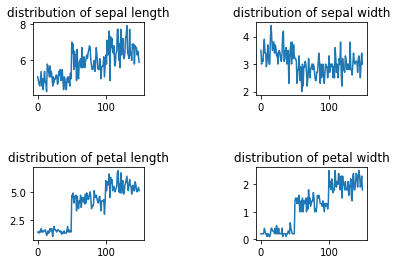

In [6]:
fig, axs = plt.subplots(2,2,gridspec_kw={'hspace': 1, 'wspace': 1})

axs[0,0].plot(df["sepal length (cm)"].values)
axs[0,0].set_title("distribution of sepal length")


axs[0,1].plot(df["sepal width (cm)"].values)
axs[0,1].set_title("distribution of sepal width")


axs[1,0].plot(df["petal length (cm)"].values)
axs[1,0].set_title("distribution of petal length")


axs[1,1].plot(df["petal width (cm)"].values)
axs[1,1].set_title("distribution of petal width")



**Analyse the distribution of labels in train and test data**

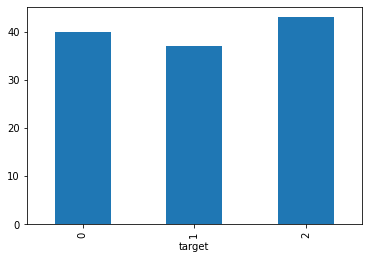

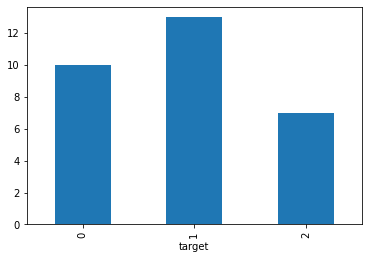

In [7]:
df_train.groupby("target").size().plot(kind="bar")
plt.show()
df_test.groupby("target").size().plot(kind="bar")

From the distribution of features, we can say that the data contains no extreme points.

From the above barplots of labels, we can see that there is no much imbalance in data. 

In [8]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


**Visualizing model 1: Deision Tree**

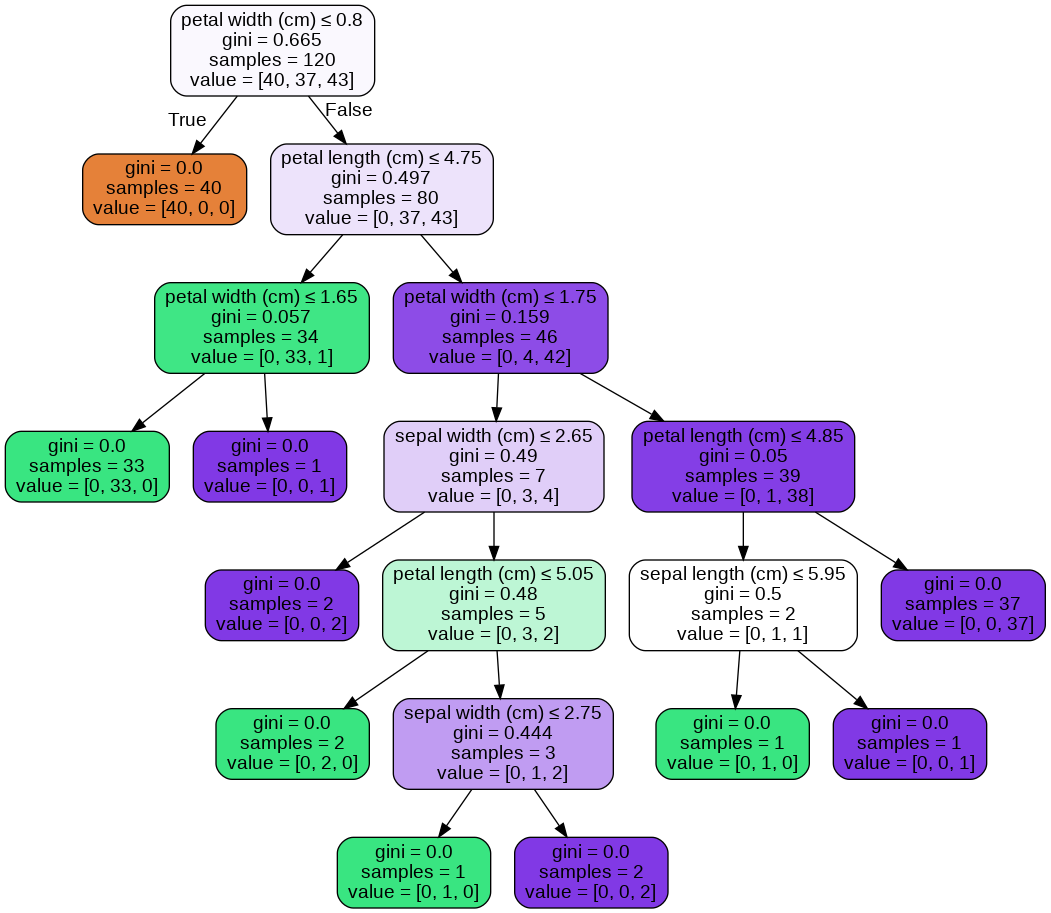

In [49]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [10]:
y_train_hat=model.predict(X_train)
y_test_hat=model.predict(X_test)

Since there is no issue for class imbalance we can use accuarcy for analysing the performance of the model

In [11]:
print("training accuracy is ",accuracy_score(y_train,y_train_hat))
print("testing accuracy is ",accuracy_score(y_test,y_test_hat))

training accuracy is  1.0
testing accuracy is  0.9666666666666667


**Conclusion from model 1- Decision Tree:** The model performance is good. As we can see the model perform without making even a single mistake in training data, but it is able to make an accuracy of 96.7% in test data

**Can we get better results for test data?**

**Model 2 : RandomForest Classifier**

In [12]:
from sklearn.ensemble import RandomForestClassifier

**Best parmeters are found using hyperparameter tuning with grid search cv**

In [38]:

params = {"n_estimators":[1,2,5,8,10,15],'max_depth': [1,2,3,4,5,6,7,8,9,10],
'min_samples_split': [2,3,4,5,6,8,10]}
clf=RandomForestClassifier()
best_model=GridSearchCV(clf,params)
best_model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [39]:
print("best value for maximum depth is ",best_model.best_estimator_.get_params()["max_depth"])
print("best value for min sample split is ",best_model.best_estimator_.get_params()["min_samples_split"])
print("best value for no of estimators is ",best_model.best_estimator_.get_params()["n_estimators"])

best value for maximum depth is  4
best value for min sample split is  3
best value for no of estimators is  2


In [55]:
model_2=RandomForestClassifier(n_estimators=best_model.best_estimator_.get_params()["n_estimators"],
                               max_depth=best_model.best_estimator_.get_params()["max_depth"]
                               ,min_samples_split=best_model.best_estimator_.get_params()["min_samples_split"])
model_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_train_hat1=model_2.predict(X_train)
y_test_hat1=model_2.predict(X_test)

In [57]:
print("training accuracy is ",accuracy_score(y_train,y_train_hat1))
print("testing accuracy is ",accuracy_score(y_test,y_test_hat1))

training accuracy is  0.9666666666666667
testing accuracy is  0.9666666666666667


**Conclusions from Model 2:** The model performance in test data is similar to that of model 1. But here the training accuracy is also reduced in an attempt to reduce overfitting of the model

**Model 3 :XGBoost**

In [43]:
import xgboost

In [44]:
from xgboost import XGBClassifier

In [58]:
model_3=XGBClassifier()
model_3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
y_train_hat2=model_3.predict(X_train)
y_test_hat2=model_3.predict(X_test)

In [60]:
print("training accuracy is ",accuracy_score(y_train,y_train_hat2))
print("testing accuracy is ",accuracy_score(y_test,y_test_hat2))

training accuracy is  1.0
testing accuracy is  1.0


**Conclusions from model 3:** This model performed exceptionally well in both training and testing data. As we can see both training and testing accuracy is 1.0